<a href="https://colab.research.google.com/github/tayfununal/derin_ogrenme/blob/master/_notebooks/2020-02-22-olasilik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olasılık
> Makine Öğrenmesi ve Derin Öğrenme için gerekli olasılık konuları.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

Makine Öğrenmesi tamamen tahminler üretme işidir. Örneğin klinik geçmişi göz önüne alındığında, bir hastanın gelecek yıl kalp krizi geçirme *olasılığını* tahmin etmek isteyebiliriz. Anormallik tespitinde, bir uçağın jet motorundan gelen bir dizi okumanın normal çalışma için ne kadar *olası* olduğunu değerlendirmek isteyebiliriz. Pekiştirmeli öğrenmede, robotun ya da daha genel olarak etmenin bir ortamda akıllıca davranmasını isteriz. Bunun anlamı, mevcut eylemlerin her biri altında yüksek bir ödül alma olasılığını düşünmemiz gerektiğidir. Tavsiye sistemleri inşa ettiğimizde de olasılıkları düşünmemiz gerekir. Örneğin, büyük bir online kitapçı için çalıştığımızı varsayalım. Belirli bir kullanıcının belirli bir kitabı satın alma olasılığını tahmin etmek isteyebiliriz. Tüm bu durumlar için olasılık dilini kullanmalıyız. Bir çok kurs, ana bilim dalları, tezler, kariyerler ve hatta bölümler olasılık bilimi üzerine kurulmuştur. Doğal olarak, bu bölümdeki amacımız tüm olasılık konularını öğretmek değildir. Bunun yerine sıfırdan, size ilk derin öğrenme modellerinizi oluşturmaya başlayabileceğiniz kadar olasılık bilgisi öğretmeyi ve isterseniz konunun kendi kendinize keşfetmeye başlayabileceğiniz kadarlık özünü kavratmak istiyoruz.

Açık açık ifade etmesek veya somut örnekler vermesek de, önceki bölümlerde olaslığı kullandık. Şimdi ilk örneğimizle başlayaşım: kedi ve köpekleri fotoğraflardan ayırt etmek. Bu basit gelebilir ama aslında zor bir problemdir. Sorunun zorluğu ilk planda görüntünün çözünürlüğüne bağlı olabilir.

![Images of varying resolutions ($10 \times 10$, $20 \times 20$, $40 \times 40$, $80 \times 80$, and $160 \times 160$ pixels).](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/cat_dog_pixels.png?raw=1)

Şekilde görüldüğü gibi, $160 \times 160$ piksel çözünürlüğe sahip resimlerde kedi ve köpekleri seçmek bizim için kolay olsa da, $40 \times 40$ piksel için zor hata $10 \times 10$ piksel için imkansızdır. Diğer bir ifadeyle, uzaklaştıkça yani çözünürlük azaldıkça kedi ve köpek resimlerini ayırt etmemiz yazı-tura atmaya dönüşmeye başlar. Olasılık sayesinde belirsizlik düzeyini matematiksel olarak ifade edebiliriz. Eğer resmim kedi resmi olduğundan tam olarak eminsek, resme karşılık gelen $y$ etiketinin "kedi" olma olasılığı yani $P(y=$ "kedi"$)$  ifadesi $1$ sayısına eşittir deriz. Fakat $y =$ "kedi" veya that $y =$ "köpek" diyebilmek için herhangi bir bulgu yok ise, olasılıkların eşit olduğunu söyler ve bunu $P(y=$ "kedi"$) = P(y=$ "köpek"$) = 0.5$ şeklinde gösteririz. Eğer resmin kedi resminden olduğu yüksek ihtimal ise fakat kesin emin değilsek, olasılığı $0.5  < P(y=$ "kedi"$) < 1$ gibi bir değer olarak tahmin ederiz.

Şimdi diğer bir örnek verelim. Hava durumu izleme verilerinden yarın İstanbul'da yağmur yağma olaslığını tahmin etmek istiyoruz. Yaz aylarındaysak yağmur yaklaşık 0.5 olasılıkla yağar.

İki örnekte de bir şeyin alacağı değerle ilgileniyoruz. Ayrıca ikisinde de sonuçtan kesin emin değiliz. Fakat iki durum arasında kritik bir farklılık var. İlk durumda resim ya kedidir ya da köpektir ve hangisi olduğunu kesin bilmiyoruz. İkinci durumda sonuç rastgele bir olay gibi görülebilir. Dolayısıyla olasılık, belirsizliğin esnek dilidir ve birçok farklı durumda etkin bir şekilde kullanılabilir.       

## Temel Olasılık Kuramı

Bir zar atalım ve gelen sayının 1 rakamı olma ihtimalini hesaplayalım. Eğer düzgün bir zar ise, 1'den 6'ya kadar olan tüm sonuçlar aynı şansa sahiptir ve dolayısıyla altıda bir oranında 1 rakamı gelir. Daha matematiksel olarak, 1 gelme olasılığının $\frac{1}{6}$ olduğunu söyleriz.  

Fabirakadan yeni çıkmış bir zarın düzgün mü değil mi olduğunu öğrenmek isteyebiliriz. Bunu öğrenmenin tek yolu zarı defalarca atmak ve sonuçları kaydetmektir. Her atışta 1 ile 6 arasında bir sonuç elde ederiz. Bu sonuçlardan her bir rakamın olasılığını bulalım. 

En basit yol her bir rakamın kaç defa geldiğini saymak ve bunu toplam atış sayısına oranlamaktır. Bu süreç belirlediğimiz *olay* için (mesela 1 gelmesi olayı) olasığı *tahmin* etmemizi sağlar. İstatistikteki *Büyük Sayılar Yasası* gereği, daha çok zar attıkça elde ettiğimiz oranlar gerçek olasılığa doğru yaklaşır. Ayrıntıya girmden önce bir deneme yapalım.  

Önce gerekli olan kütüphaneleri yükleyelim. 

In [0]:
!pip install d2l==0.13.2 -f https://d2l.ai/whl.html # installing d2l
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6

Şimdi de kullanacağımız araçları ve paket programları çağıralım.

In [0]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import np, npx
import random
npx.set_np()

Şimdi zar atma işini programla yapmak istiyoruz. İstatistikte buna olasılık dağılımından *örneklem* alma denir. Belli sayıda seçeneğe karşılık gelen olasılıkları veren dağılıma *çokterimli dağılım* (multinomial distribution) denir. İleride *dağılım* kavramı daha net açıklanacaktır ama şimdilik bunu olaylara olasılık eşleme olarak düşünebilirsiniz. 


MXNet ile çokterimli dağılımdan örneklem almak için `np.random.multinomial` fonksiyonunu kullanıyoruz. Bu fonksiyonu farklı şekillerde yükleyip kullanabilirsiniz, biz en kolayını tercih edeceğiz. 

Öncelikle `np.random.multinomial` fonksiyonunun verdiği vektörü ele alalım. Bu vektörün bileşenleri, bu blieşene karşılık gelen sonucun kaç defa elde edildiğini gösterir. Mesela zar atmada, $6$ bileşenli bir vektör vardır ve ilk bileşen $1$ rakamının kaç defa geldiğini, benzer şekilde $i$ bileşeni $i$ sonucunun kaç defa geldiğini gösterir.  

Zarı 1 defa atalım.

In [0]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 1, 0, 0], dtype=int64)

Bunu defalarca çalıştırırsanız her seferinde rastgele sonuçlar elde edersiniz. Zarın düzgün olu olmadığını anlamak için bu dağılımdan birçok örneklem almalıyız. Mesela 10 zar atmak için `for` döngüsü yerine aşağıdakini kullanırız ve birbirinden bağımsız 10 sonucu aynı anda elde etmiş oluruz. 

In [0]:
np.random.multinomial(10, fair_probs)

array([1, 1, 5, 1, 1, 1], dtype=int64)

Ayrıca bu deneyi örneği aynı anda 3 defa yapabiliriz. 

In [0]:
counts = np.random.multinomial(10, fair_probs, size=3)
counts

array([[1, 2, 1, 2, 4, 0],
       [3, 2, 2, 1, 0, 2],
       [1, 2, 1, 3, 1, 2]], dtype=int64)

Şimdi zarı 1000 defa atalım ve herbir sonucun gelme oranının bulalım. Bu sayede olasılıkları tahmin etmiş olacağız.

In [0]:
# Sonuçları 32 bit boyutunda ondalıklı bilgisayar sayıları olarak kaydedelim.
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000  # Oranlar 

array([0.164, 0.153, 0.181, 0.163, 0.163, 0.176])

Düzgün bir zardan örneklem aldığımız için herbir sonucun gerçek olasılığının $\frac{1}{6}$ veya yaklaşık $0.167$ olduğunu biliyoruz. Dolayısıyla tahminimiz oldukça iyi görünüyor.  

Bu tahminlerin örneklem boyutu ve sayısı arttıkça gerçek olasılığa nasıl yaklaştığını görselleştirelim. Örneklem boyutu 10 olan 500 deneyin sonuçlarının gerçek olasılığa nasıl yaklaştığını görelim.

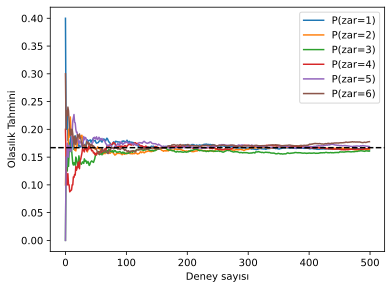

In [0]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(zar=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Deney sayısı')
d2l.plt.gca().set_ylabel('Olasılık Tahmini')
d2l.plt.legend();

Yukarıdaki şekilde sürekli eğriler zarın herbir yüzüne karşılık gelen olasılık tahmininin deney sayısına göre değişimini veriyor. Kesikli çizgi de gerçek olasılığı gösteriyor ve görüldüğü gibi sürekli eğriler buna doğru yaklaşıyor.

### Olasılık Kuramının Aksiyomları

Zar atma ile ilgili çalışırken $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ kümesine *öneklem uzayı*, herbir elemana *çıktı* veya *sonuç* diyoruz. Bazı sonuçlardan oluşan bir kümeye *olay* denir. Örneğin $5$ gelmesi yani $\{5\}$ 
olayı veya tek sayı gelmesi yani $\{1, 3, 5\}$ olayı gibi. Eğer gözlem sonucu $\mathcal{A}$ kümesinde yer alıyorsa bu $\mathcal{A}$ olayı gerçeklşmiş olur. Mesala eğer zar $3$ gelmiş ise, *tek sayı gelmesi olayı* gerçekleşmiş olur çünkü $3 \in \{1, 3, 5\}$ sağlanır.   

Matematiksel olarak *olasılık*, kümelere reel sayı karşılık getiren bir fonksiyon olarak tanımlanır. $\mathcal{S}$ örneklem uzayındaki bir $\mathcal{A}$ olayının olasılığı $P(\mathcal{A})$ ile gösterilir ve aşağıdaki özellikleri sağlar.  

* Herhangi bir $\mathcal{A}$ olayının olasılığı negatif olamaz, yani $P(\mathcal{A}) \geq 0$;
* Örneklem uzayının olasılığı $1$ olmalıdır, yani $P(\mathcal{S}) = 1$;
* *Karşılıklı ayrık* olan yani $i \neq j$ için $\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$ biçimindeki sayılabilir çoklukta $\mathcal{A}_1, \mathcal{A}_2, \ldots$ olayları için herhangi birisinin gerçekleşmesi olasılığı olasılıklarının toplamına eşittir, yani $P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$.

Bunlara olasılık kuramının aksiyomları denir ve Kolmogorov tarafından 1930'da tanımlanmıştır. Bu sağlam temeller sayesinde rastgelelik ile ilgili felsefi tartışmalardan kurtulup matematiksel araçlarla çalışabilir ve yeni sonuçlar elde edebiliriz. Mesela $\mathcal{A}_1$ olayını örneklem uzayının tamamı ve diğer her $i > 1$ için $\mathcal{A}_i = \emptyset$ olarak alırsak, $P(\emptyset) = 0$ buluruz, yani boş kümenin olasılığı sıfırdır.  

### Rassal Değişkenler

Zar atma deneyinde *rassal değişken* (random variable) kavramını kullandık. Rassal değişken herhangi bir tür çokluk olabilir ve belirgin (deterministic) değildir. Deneydeki mümkün olan tüm değerleri alabilir. Mesela $X$ rassal değişkeni zar atma deneyindeki $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ örneklem uzayında değerler alsın. Zarın $5$ gelmesi olayını $\{X = 5\}$ veya $X = 5$ şeklinde olasılığını da $P(\{X = 5\})$ veya $P(X = 5)$ ile gösterebiliriz. $P(X = a)$ ile $X$ rassal değişkeni ve onun aldığı $a$ değerini ayrı ayrı belirtmiş oluyoruz. Ancak bu gösterim uzun olacağından, $P(X)$ ile $X$ rassal değişkeninin dağılımını (distribution), $P(a)$ ile de $a$ değerini alma olasılığını göstereceğiz. Benzer şekilde rassal değişkenin belli bir aralıkta değerler alma olasılığını da belirtebiliriz. Örneğin $P(1 \leq X \leq 3)$ ile $X$ rassal değişkeninin $\{1, 2, 3\}$ değerlerini alma ihtimalini gösteriyoruz.

Zarın üzerindeki rakamlar gibi *ayrık* rassal değişkenler ile bir insanın boyu gibi *sürekli* rassal değişkenler arasında önemli bir fark vardır. İki kişinin tam olarak aynı boyda olması pek mümkün değildir. Eğer çok hassas bir uzunluk ölçme aracımız olsaydı, dünyada her kişinin boyunun diğerlerinden farklı olduğunu görürdük. Dolayısıyla bir kişinin boyunun örneğin 1.80139278291028719210196740527486202 metre olma ihtimalini hiçbir zaman sorgulamayız. Dünya nüfusu alındığında bile bu ihtimal sıfırdır. Burada bir kişinin boyunun belirlenen bir aralıkta olma ihtimali anlamlı olur, mesela 1.79 ile 1.81 metre arası gibi. Böyle sürekli rassal değikenlerde herbir değerin *yoğunluk* (density) olarak olasığı değrlendirilir. Mesela 1.80 metrenin olasılığı sıfırdır ama yoğunluğu sıfırdan büyük bir sayıdır. Bir aralıkta olasılık ise sıfırdan farklı bir değer alabilir. Bu bölümde kesikli rassal değişkenler kullanılacaktır, sürekli rassal değikenlerin olasılığı için Rassal Değişkenler bölümüne bakınız.    

## Rassal Değişkenlerin Birbiriyle İlişkileri 

Genellikle birden fazla rassal değişkeni bir arada  inceleriz. Örneğin Grip ile öksürük gibi belli bir hastalık ile bir belirtinin hastalarda ayrı ayrı ve bir arada görülmesi olasılıkları üzerinden ilişkileri incelenebilir. Bu sayede daha etkin tedavi için çıkarımlar yaılabilir.

Daha karmaşık bir örnek olarak milyonlarca ikselden oluşan resimleri ele alalım. Piksellerin renk değerleri birer rassal değişken olarak görülebilir. Ayrıca resimleri belirten etiketler, yer, konum gibi diğer veriler de birer rassal değişken olarak düşünülebilir. Tüm bu rassal değişkenler bir arada yer alr. Rassal değişkenlerin bir birlerine göre durumlarını incelerken birçok nicelik kullanırız, şimdi bunları görelim.

### Ortak Olasılık (Joint Probability)

İlkine *ortak olasılık* denir ve $P(A = a, B=b)$ ile gösterilir. Belli $a$ ve $b$ değerleri için ortak olasılık bize aynı anda $A=a$ ve $B=b$ olması olasılığını verir. Burada her $a$ ve $b$ için  $P(A=a, B=b) \leq P(A=a)$ olur. Çünkü aynı anda $A=a$ ve $B=b$ olması için ayrı ayrı $A=a$ olmalı ve $B=b$ olmalıdır. Dolayısıyla herbirinin ayrı ayrı olması birlikte olmalarından daha muhtemeldir.   

### Koşullu Olasılık (Conditional Probability)

Yukarıdaki eşitsizlikten dolayı $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$ elde edilir. Bu orana *koşullu olasılık* denir ve $P(B=b \mid A=a)$ ile gösterilir. Anlamı da, $A=a$ durumunda $B=b$ olması olasılığıdır. 

### Bayes Teoremi

Koşullu olasılık tanımını kullanarak İstatistiğin en önemli ve gerekli denklemlerinden birisini, yani Bayes Teoremi elde edilebilir. Şöyle ki, tanımdan *çarpım kuralı* yani $P(A, B) = P(B \mid A) P(A)$ elde edilir. $P(A, B)=P(B, A)$ olduğundan aynı zamanda $P(A, B) = P(A \mid B) P(B)$ yazılabilir. $P(B) > 0$ kabul edilerek ve sadeleştirmeyle 

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}$$

olur. Yukarıda $P(A, B)$ gösteimi ile belirtilen dağılıma *ortak dağılım*, $P(A \mid B)$ ile gösterilen dağılıma da *koşullu dağılım* denir. Bu dağılımların özel olarak $A = a, B=b$ için değerleri hesaplanabilir. 

### Ayırma (Marginalization)

Bayes Teoremi bir şeyden diğeri için çıkarım yapmada çok yararlıdır. Neden-sonuç ilişkisi gibi durumlarda nasıl kullanılacağını sonraki bölümlerde göreceğiz. Bunun için *ayırma* işlemine ihtiyacımız var. Bu işlem ile $P(A, B)$ yardımıyla $P(B)$ elde edilmektedir. $B$ rassal değişkeninin olasılığı, $A$ rassal değişkeninin alabileceği her değer için ortak olasılıkların toplamıdır. Buna *toplam kuralı denir* ve 

$$P(B) = \sum_{A} P(A, B)$$

biçiminde formülleştirilir. Ayırma sonucunda elde edilen olasılığa ya da bunun dağılımına *marjinal olasılık* ya da *marjinal dağılım* denir. 

### Bağımsızlık (Independence)

Rassal değişkenler arasında bakılan bir diğer özellik de *bağımlılık* ya da tersi *bağımsızlık* durumudur. $A$ ve $B$ gibi iki rassal değişkenin bağımsız olması, $B$ rassal değişkeninin aldığı değerlerin $A$ için herhangi bir bilgi ortaya koymaması olarak özetlenebilir. Bu durumda $P(B \mid A) = P(B)$ olur. İstatistikçiler bağımsızlığı $A \perp  B$ ile gösterir. Bayes Toeremi gereği P(A \mid B) = P(A)$ elde edilir. Diğer hallerde $A$ ve $B$ bağımlıdır. Örneğin iki zarın arka arkaya atılması bağımsız rassal değişkenler verir. Bununla birlikte bir odadaki elektrik düğmesi ile odanın aydınlık olması bağımlıdır. (Elektrik düğmesinin açık olması aydınlık olacağını kesin gerektirmez çünkü düğme bozu olabilir ya da elektrikler kesilebilir.)  

$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ eşitliğiyle ile $P(A, B) = P(A)P(B)$ eşitliği birbirine denk olduğundan, iki rassal değişkenin bağımsız olması ortak dağılımın bunların dağılımlarının çarpımına eşit olması ile aynı şeydir. Benzer şekilde $A$ ve $B$ rassal değişkenleri $C$ rassal değikenine göre *koşullu bağımsızlık* tanımı $P(A, B \mid C) = P(A \mid C)P(B \mid C)$ olarak verilebilir ve $A \perp B \mid C$ biçiminde gösterilir. 

### Uygulamalar 

Şimdi öğrendiklerimizi sınayalım. Bir doktor kendisine başvuran bir kişiye AIDS testi uyguluyor. Bu test oldukça güvenilir ve sağlam bir kişiyi AIDS hastası göstermesi olasılığı %1. Hatta HIV virüsü taşıyan bir kişiyi tesit etmede kesinlikle hata yapmıyor. $D_1$ ile teşhisi gösterirelim, yani pozitif teşhis için $1$, negatif teşhis için $0$ değerini alsın. $H$ ile de HIV virüsü taşımayı gösterelim, dolayısıyla HIV pozitif için $1$, HIV negatif için $0$ değeri alsın. Aşağıdaki tablo eldeki verileri özetler.    

| Koşullu Olasılık | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |

Tablodaki sütunların toplamı 1 olmalıdır çünkü koşullu olasılık da bir olasılık dağılımıdır. Doktora başvuran kişinin testi pozitif çıkıyor, bu durumda kişinin AIDS olma olasılığını inceleyelim. Yani $P(H = 1 \mid D_1 = 1)$ değerini hesaplamak istiyoruz. Bu oran hastalığın toplumda ne kadar yaygın olduğuna bağlıdır, çünkü yanlış alarm oranını buradan elde ederiz. Toplumun oldukça sağlıklı olduğunu örneğin $P(H=1) = 0.0015$ olduğunu kabul edelim. Bayes Teoremi'ni uygulamadan önce ayırma ve çarım kuralı ile aşağıdaki hesabı yapalım:  

$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

Dolayısıyla 

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}$$

elde edilir. Diğer bir ifadeyle kişinin gerçekten AIDS olma olasılığı sadece %13.06 olarak bulunur. Test oldukça güvenilirdi ama oran düşük çıktı. Olasılık bazen sezgilere aykırı olabiliyor. 

Kişi testi pozitif çıkınca ne yapmalıdır? Büyük ihtimalle farklı bir test daha uygulanacaktır. İkinci test biraz farklı özellikte ve ikincisi kadar iyi değil. Tabloda özelliklerini görelim.  

| Koşullu Olasılık | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |

Maalesef ikinci test sonucu da pozitif çıkıyor. İki tstin koşullu olarak bağımsız olduğunu düşünerek Bayes Teoreni'ni uygulayalım: 

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$

Şimdi ayırma ve çarpım kuralını uygulayabiliriz:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

Sonuç olarak kişinin AIDS olma olasılğı hesalanırsa

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307
\end{aligned}
$$

elde edilir. Yani ikinci test çok daha emin olmamızı sağladı. İkinci test birincisine göre oldukça az güvenilirdi ama tahminimizi önemli ölçüde geliştirdi. 

## Beklenen Değer ve Varyans (Expectation and Variance)

Olasılık dağılımlarının belirgin özelliklerini özetlemek için bazı ölçümlere ihtiyaç vardır. Bir $X$ rassal değişkeni için *beklenen değer* (ya da ortalama),  

$$E[X] = \sum_{x} x P(X = x)$$

şeklinde gösterilir ve tanımlanır. Eğer bir $f(x)$ fonksiyonunun girdileri $P$ dağılımına sahip bir rassal değişkende geliyorsa bu fonksiyonun beklenen değeri 

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x)$$

olarak tanımlanır. 

Genellikle $X$ rassal değişkeninin ortalamadan ne kadar satığını bilmek isteriz. Bunu aşağıda tanımlanan *varyans* ile yaparız:

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

Varyansın karekökü *standart sapma* olarak adlandırılır. Rassal değişkenin bir fonksiyonu için varyans benzer şekilde tanımlanır ve dağılımdan farklı $x$ örneklemleri alındığında fonksiyonun ortalamasından ne kadar saptığını gösterir: 

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$


## Özet

* Olasılık dağılımında örneklem alabiliriz. 
* Birçok rassal değişkeni ortak dağılım, koşullu dağılım, Bayes Kuralı, ayırma ve bağımsızlık kavramları yardımıyla bir arada analiz edebiliriz.
* Ortalama ve varyans olasılık dağılımının belirgin özelliklerini özetlemek için yararlı araçlardır. 

## Alıştırmalar

1. Deneyimizde $n=10$ boyutunda örneklem için $m=500$ grup aldık. Siz de $m$ ve $n$ için farklı değerler alarak inceleme yapın. 
2. $P(\mathcal{A})$ ve $P(\mathcal{B})$ olasılıklarına sahip olayları göz önüne alarak $P(\mathcal{A} \cup \mathcal{B})$ ve $P(\mathcal{A} \cap \mathcal{B})$ olasılıkları için alt ve üst sınırlar belirleyin. (Venn Şeması ile görebilirsiniz.) 
3. $A$, $B$, ve $C$ gibi üç rassal değişkenimiz var. $B$ sadece $A$ ile bağımlı ve $C$ sadece $B$ ile bağımlı. $P(A, B, C)$ olasılığını nasıl sadeleştirirsiniz? (Bu bir [Markov Zinciri'dir](https://en.wikipedia.org/wiki/Markov_chain).)
4. Uygulamamızda ilk test daha güvenilirdi. Neden ilk testi ikinci kez tekrarlamak iyi bir fikir değildir? 


[Discussions](https://discuss.d2l.ai/t/36)